# Phase 04

# Unsupervised ML (Clustering)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_crime=pd.read_csv("C:/Users/ssour/OneDrive/Documents/Sourav document/district wise.csv")
df_crime

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [3]:
df_crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

# 4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(df_crime)

# Feature selection (excluding non-crime columns)
crime_columns = [
    'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
    'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
    'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
    'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
    'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
    'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
    'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'
]
features = df_crime[crime_columns]

# Data normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_crime['Cluster'] = kmeans.fit_predict(scaled_features)

# Label clusters (you may need to adjust the labels based on the cluster analysis)
cluster_labels = {0: 'Sensitive Area', 1: 'Moderate Area', 2: 'Peaceful Area'}
df_crime['Cluster_Label'] = df_crime['Cluster'].map(cluster_labels)

# Display the DataFrame with clusters
print(df_crime[['STATE/UT', 'DISTRICT', 'Cluster_Label']])

            STATE/UT       DISTRICT   Cluster_Label
0     ANDHRA PRADESH       ADILABAD  Sensitive Area
1     ANDHRA PRADESH      ANANTAPUR  Sensitive Area
2     ANDHRA PRADESH       CHITTOOR  Sensitive Area
3     ANDHRA PRADESH       CUDDAPAH  Sensitive Area
4     ANDHRA PRADESH  EAST GODAVARI  Sensitive Area
...              ...            ...             ...
9012     LAKSHADWEEP    LAKSHADWEEP  Sensitive Area
9013     LAKSHADWEEP          TOTAL  Sensitive Area
9014      PUDUCHERRY       KARAIKAL  Sensitive Area
9015      PUDUCHERRY     PUDUCHERRY  Sensitive Area
9016      PUDUCHERRY          TOTAL  Sensitive Area

[9017 rows x 3 columns]


So as you can see , here we have succesfully created all three clusters of sensitive area, moderate area and peaceful area.

Here we can see that sensitive area is more as compared to other area

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [5]:
features = df_crime[crime_columns]

# Data normalization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_crime['Cluster'] = kmeans.fit_predict(scaled_features)

# Label clusters
cluster_labels = {0: 'Sensitive Area', 1: 'Moderate Area', 2: 'Peaceful Area'}
df_crime['Cluster_Label'] = df_crime['Cluster'].map(cluster_labels)

# Create DataFrames for each cluster
df_sensitive = df_crime[df_crime['Cluster_Label'] == 'Sensitive Area']
df_moderate = df_crime[df_crime['Cluster_Label'] == 'Moderate Area']
df_peaceful = df_crime[df_crime['Cluster_Label'] == 'Peaceful Area']

# Display the DataFrames
print("Sensitive Areas:")
print(df_sensitive)
print("\nModerate Areas:")
print(df_moderate)
print("\nPeaceful Areas:")
print(df_peaceful)

Sensitive Areas:
            STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            

# 4.3  "Analyze your clusters and prepare a report that explains all your observations

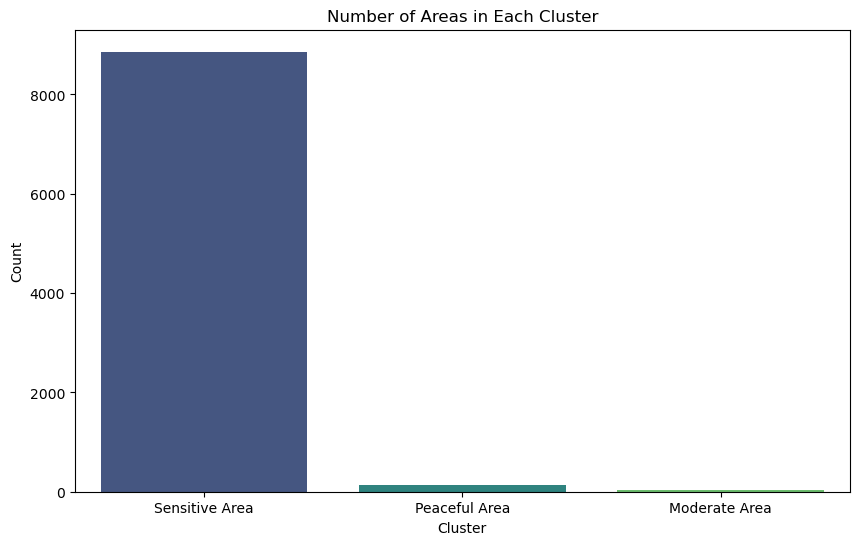

In [6]:
import seaborn as sns

# Count the number of areas in each cluster
cluster_counts = df_crime['Cluster_Label'].value_counts().reset_index()
cluster_counts.columns = ['Cluster_Label', 'Count']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_counts, x='Cluster_Label', y='Count', palette='viridis')
plt.title('Number of Areas in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

As you can see , as soon as we created the clusters , we found out that the Sensitive Area is highest among all , compared to the Peaceful and Moderate Area.

In [7]:
df_sensitive

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster,Cluster_Label
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,16,149,34,175,0,181,1518,4154,0,Sensitive Area
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,7,118,24,154,0,270,754,4125,0,Sensitive Area
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,14,112,83,186,0,404,1262,5818,0,Sensitive Area
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,17,126,38,57,0,233,1181,3140,0,Sensitive Area
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,12,109,58,247,0,431,2313,6507,0,Sensitive Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,0,32,60,0,Sensitive Area
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,0,32,60,0,Sensitive Area
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0,2,0,1,0,44,392,787,0,Sensitive Area
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,0,7,2,5,0,219,1668,3494,0,Sensitive Area


In [8]:
df_peaceful

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster,Cluster_Label
28,ANDHRA PRADESH,TOTAL,2001,2602,1555,136,871,0,871,1182,...,420,3544,2271,5791,7,7400,34344,130089,2,Peaceful Area
169,GUJARAT,TOTAL,2001,1226,537,94,286,0,286,998,...,67,756,111,3667,0,2924,50719,103419,2,Peaceful Area
285,KARNATAKA,TOTAL,2001,1626,1475,74,293,0,293,559,...,220,1665,81,1755,0,100,47301,109098,2,Peaceful Area
302,KERALA,TOTAL,2001,472,615,111,562,0,562,183,...,27,1942,81,2561,0,0,54544,103847,2,Peaceful Area
351,MADHYA PRADESH,TOTAL,2001,2425,2870,125,2851,0,2851,956,...,609,7063,751,2562,0,3297,85143,181741,2,Peaceful Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,MAHARASHTRA,TOTAL,2012,2712,2168,171,1839,0,1839,1583,...,329,3935,1294,7415,0,13311,46668,202700,2,Peaceful Area
8734,ODISHA,TOTAL,2012,1548,1879,54,1458,0,1458,1542,...,525,4187,304,2638,0,3605,22203,67957,2,Peaceful Area
8806,RAJASTHAN,TOTAL,2012,1461,1538,98,2049,0,2049,3243,...,478,2352,18,13312,0,8284,70240,170948,2,Peaceful Area
8851,TAMIL NADU,TOTAL,2012,1949,2954,44,737,0,737,1945,...,110,1494,382,1965,0,15499,124176,200474,2,Peaceful Area


In [9]:
df_moderate

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster,Cluster_Label
115,BIHAR,TOTAL,2001,3643,3419,250,888,0,888,2159,...,859,562,21,1558,83,2406,36667,88432,1,Moderate Area
650,UTTAR PRADESH,TOTAL,2001,7601,7964,1186,1958,0,1958,4330,...,2211,2870,2575,7365,0,7129,57839,178129,1,Moderate Area
831,BIHAR,TOTAL,2002,3712,3526,396,1040,0,1040,2361,...,927,621,6,1577,38,2497,39145,94040,1,Moderate Area
1366,UTTAR PRADESH,TOTAL,2002,6825,6283,1243,1415,1,1414,3430,...,1893,2145,1887,5679,0,7313,48569,146037,1,Moderate Area
1553,BIHAR,TOTAL,2003,3771,3540,298,985,0,985,2427,...,909,688,11,1880,37,2574,37503,92263,1,Moderate Area
2095,UTTAR PRADESH,TOTAL,2003,5284,3793,1525,911,0,911,2208,...,1322,1098,4970,2626,0,4428,29449,95073,1,Moderate Area
2281,BIHAR,TOTAL,2004,3948,2995,280,1390,1,1389,3413,...,1029,704,13,2679,35,2405,44178,108060,1,Moderate Area
2824,UTTAR PRADESH,TOTAL,2004,6126,5580,1436,1397,0,1397,3337,...,1708,1900,2682,4950,3,7136,40711,130181,1,Moderate Area
3013,BIHAR,TOTAL,2005,3471,3307,259,1147,0,1147,2693,...,1014,451,13,1574,74,2680,40057,97850,1,Moderate Area
3557,UTTAR PRADESH,TOTAL,2005,5711,5637,1520,1217,0,1217,2955,...,1564,1835,2881,4505,0,7406,37158,122108,1,Moderate Area


# THANK YOU 